# Bar chart
## 描繪categorical variable的分布
> 每個類型是一個 bar，其高度是 frequency

In [1]:
# import necessary librarys and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

poke_df = pd.read_csv('pokemon.csv')
poke_df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


#### 使用的工具

> - [sns.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html)
- [sns.color_palette()](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) - returns a list of RGB tuples. 
- [pd.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
- [pd.melt()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html) - “Unpivots” a DataFrame from wide format to long format.
- [plt.xticks()](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html)
- [np.arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)
- [zip()](https://docs.python.org/3.3/library/functions.html#zip) - Make an iterator that aggregates elements from each of the iterables.

### 每一季的分布

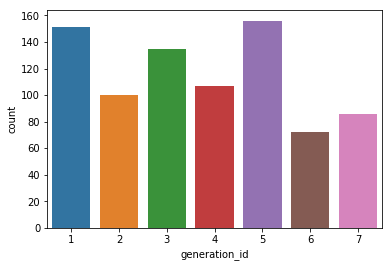

In [2]:
sns.countplot(data=poke_df, x='generation_id');

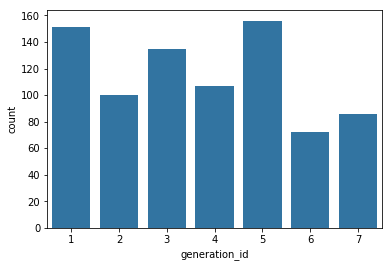

In [3]:
# because the color is unnecessary, let's change it.
# get the first bar color
base_color = sns.color_palette()[0]

sns.countplot(data=poke_df, x='generation_id', color=base_color);

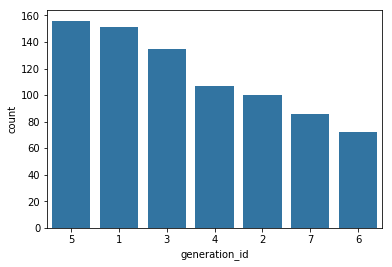

In [4]:
# For nominal-type data, one common operation is to sort the data in terms of frequency. 
# value_counts will automatically sort the order
gen_order = poke_df.generation_id.value_counts().index
sns.countplot(data=poke_df, x='generation_id', color=base_color, order=gen_order);

Note: 對於 ordinal-type 的資料，最好的方法還是把那個 column 換成 ordered categorical data type，讓他們以該有的順序呈現，參考[CategoricalDtype](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categoricaldtype)
```python
level_order = ['Alpha', 'Beta', 'Gamma', 'Delta']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['cat_var'] = df['cat_var'].astype(ordered_cat)
```

### 屬性的分布 - Absolute Frequency

In [5]:
# Create a dataframe with both type_1 and type_2 in a sigle column
poke_types = pd.melt(frame=poke_df, 
                     id_vars=['id', 'species'], 
                     value_vars=['type_1', 'type_2'], 
                     var_name='type_level', 
                     value_name='type')
poke_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
810,4,charmander,type_2,NaN
811,5,charmeleon,type_2,NaN


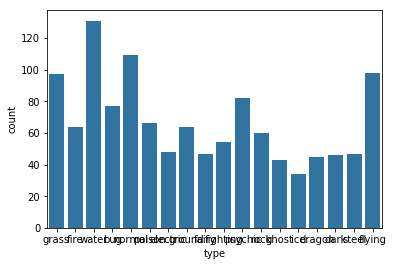

In [6]:
sns.countplot(data=poke_types, x='type', color=base_color);

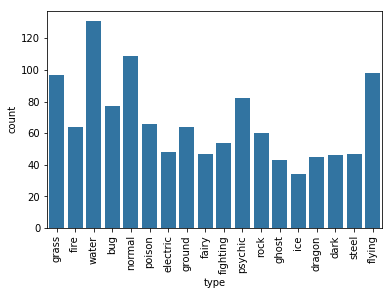

In [7]:
# the x ticks are all overlapping together
# let's change it
sns.countplot(data=poke_types, x='type', color=base_color);
plt.xticks(rotation=90);

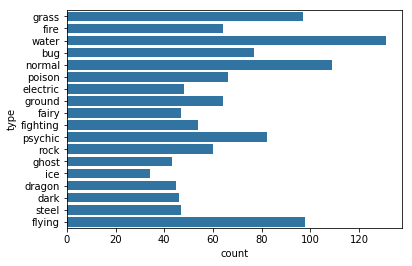

In [8]:
# or we can plot a horizontal bar chart simply by change x to y
sns.countplot(data=poke_types, y='type', color=base_color);

### 屬性的分布 - Relative Frequency
> 常見的方法是把記數的那個軸直接 relabel 成比率，底下的資料不變，只是軸的尺度改變了而已。


In [9]:
# We can relabel the counts axis in terms of proportions.
# get the proportion list for x ticks
type_count = poke_types.type.value_counts()
type_order = type_count.index
n_poke = poke_df.shape[0]
max_count = type_count[0]
max_prop = max_count / n_poke
max_prop

0.1623296158612144

In [10]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ["{:.2f}".format(p) for p in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

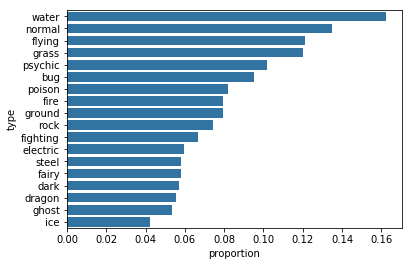

In [11]:
sns.countplot(data=poke_types, y='type', color=base_color, order=type_order);
plt.xticks(ticks=tick_props * n_poke, labels=tick_names);
plt.xlabel('proportion');

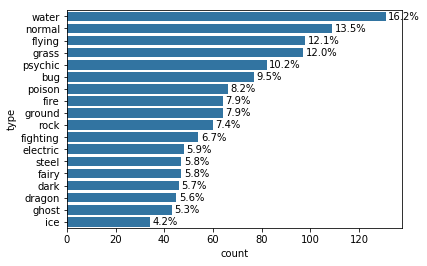

In [12]:
# We can also use text annotations to label the frequencies on bars instead. 
# get the current tick locations and labels
sns.countplot(data=poke_types, y='type', color=base_color, order=type_order);

locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = type_count[label.get_text()]
    string = '{:0.1f}%'.format(100*count/n_poke)
    # print the annotation just below the top of the bar
    plt.text(count+1, loc, string, va='center')

### Summary
> ```countplot``` can be used on data that is not yet summarized to get rid of extra summarization work. If you data is already summarized, you can try ```barplot```.